**Projet Final I3 - Visualisation de données financières pour l'analyse technique**

# **Introduction**

* L'objectif de ce projet est de créer des outils de visualisation de données financières pour l'**analyse technique**. L'analyse technique correspond à l'étude des graphiques des cours de la bourse et de différents indicateurs afin d'essayer de prévoir l’évolution des marchés. Nous visualiserons les signaux (d'achat ou de vente par exemple) détectés grâce à l'analyse des indicateurs boursiers que nous représenterons.

* Pour ce projet, nous avons choisi de nous intéresser au cours des actions de **Tesla (TSLA)**. Nous chercherons à visualiser certaines des dynamiques qui ont été observées vis-à-vis du cours des actions Tesla. En effet, le prix des actions TSLA a fortement évolué suite à la crise du COVID et à son entrée dans l'indicateur boursier S&P500 (Cf. Sources [1] & [2]).

* **Que peut-on apprendre sur ce titre via l'analyse des graphiques obtenus?**


# **1. Importation des bibliothèques et des données financières**

Importation des bibliothèques.

In [3]:
!pip install mplfinance
import mplfinance as mpf
mpf.__file__
import sys
print(sys.path)

['C:\\Users\\20cent', 'C:\\Users\\20cent\\anaconda3\\python38.zip', 'C:\\Users\\20cent\\anaconda3\\DLLs', 'C:\\Users\\20cent\\anaconda3\\lib', 'C:\\Users\\20cent\\anaconda3', '', 'C:\\Users\\20cent\\anaconda3\\lib\\site-packages', 'C:\\Users\\20cent\\anaconda3\\lib\\site-packages\\locket-0.2.1-py3.8.egg', 'C:\\Users\\20cent\\anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\20cent\\anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\20cent\\anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\20cent\\anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\20cent\\.ipython']


In [1]:
# Bibliothèques utilisées pendant les TP.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Bibliothèques spécifiques à la finance, aux séries temporelles ou à la manipulation/l'affichage de données.
!pip install mplfinance # mplfinance = matplotlib finance.
import mplfinance as mpf
import yfinance as yf # Importation de données financières avec l'API Yahoo Finance.
import datetime # Nous manipulerons des séries temporelles de données.
import matplotlib.dates as mdates # Pour faire des conversions en mdates.
from IPython.display import display # Pour améliorer l'affichage des dataframes.

ERROR: Invalid requirement: '#'


ModuleNotFoundError: No module named 'mplfinance'

Définition des dates de début de fin des prélèvements de données financières.

In [ ]:
start = datetime.datetime(2019, 1, 1)
end = datetime.datetime.now()

Importation des données financières avec l'API de **Yahoo! Finance**. On récupère dans un dataframe un ensemble de valeurs nous donnant des renseignements sur l'action considérée pour chaque journée (ici Telsa). Par exemple, *Open* et *Close* correspondent aux valeurs des actions Tesla à l'ouverture et à la fermeture des marchés sur la journée. *Volume* correspond au nombre de titres échangés sur la journée et *Adj Close* au prix de clôture ajusté de l'action (Prix qui prend en compte divers facteurs pouvant affecter le prix de l'action tels les dividendes, les fractionnements d'action et autres opérations sur les titres).

In [ ]:
# Importation des données dans le dataframe df_tesla.
df_tesla = yf.download("TSLA", start=start, end=end) #On peut changer TSLA par AAPL (APPLE) par exemple.

# Affichage du dataframe.
display(df_tesla.head())

# **2. Première représentation du cours de l'actif TSLA**

**2.1. Première représentation du cours de l'actif TSLA**

La représentation de l'évolution temporelle du prix de clôture des actions Tesla ainsi que le volume d'actions TSLA échangées sur les marchés donnent de premières informations intéressantes sur cet actif. On constate en effet une augmentation du prix des titres TSLA et des volumes d'actions échangées à partir de 2020 (Cf. Sources [1] & [2])

In [ ]:
plt.figure(figsize=(30,12))

# Prix de clôture ajusté.
plt.subplot(2,1,1)
plt.plot(df_tesla.index,df_tesla['Adj Close'], color='green', label='Adj Close')
plt.title("Prix de clôture ajusté des actions de Tesla en fonction du temps")
plt.xlabel("Année")
plt.ylabel("USD")
plt.legend()

# Volumes de titres échangés.
plt.subplot(2,1,2)
plt.bar(df_tesla.index,df_tesla['Volume'], color='blue', label='Volume')
plt.title("Volume des actions Tesla échangées sur le marché")
plt.xlabel("Année")
plt.ylabel("Nombre d'actions")
plt.legend()

# **3. Moyenne Mobile Simple (Simple Moving Average)**

**3.1. Tendance évolutive à long terme et détection de signaux de vente/d'achat avec une Moyenne Mobile (Moving Average)**

* L'objectif de l'analyse technique consiste est d'essayer de **repérer les tendances évolutives à long terme des cours** afin d'optimiser sa stratégie de *trading* et ainsi obtenir les meilleurs gains possibles en minimisant les risques.

* The *100-Moving-Average (100-ma) Strategy* est une stratégie de trading qui consiste à faire pour chaque date la moyenne des prix de clôture d'une action sur les 100 jours précédant cette date. Il s'agit d'une méthode de lissage des fluctuations d'une série temporelle qui a pour objectif de mettre en lumière les tendances à long terme: elle agit comme un filtre sur le série de données étudiée. Cette moyenne est dite mobile car le sous-ensemble de calcul effectue un "roulement" où à chaque date la donnée la plus vieille est effacée et la plus récente ajoutée. Considère ici une moyenne glissante simple (SMA) sans pondérations.


Dans le bloc suivant on va créer deux colonnes dans notre dataframe *df_tesla*: une pour les valeurs de la 100-MA et une pour la différence entre la 100-MA et le prix de clôture.

In [ ]:
# Moyenne glissante avec un roulement sur 100 données (window=100)
df_tesla['100ma'] = df_tesla['Adj Close'].rolling(window=100, min_periods=0).mean() # min_periods indique le nombre minimal de valeurs qu'il faut pour calculer la moyenne.
# Différence entre la 100-ma et le prix de clôture.
df_tesla['difference'] = df_tesla['100ma'] - df_tesla['Adj Close']

On rédige également une stratégie pour détecter les signaux de vente et d'achat pour les représenter sur notre graphique.

* La stratégie derrière l'étude des courbes de moyennes mobiles consiste à les comparer au cours du titre considéré pour essayer d'identifier des potentiels signaux d'achat ou de vente. La courbe 100-MA nous renseigne également sur la tendance du cours.
* Par exemple, si la courbe 100-MA passe en-dessous du cours, alors l'investisseur a intérêt à vendre ses titres car cela signifie que le prix actuel des actions Tesla est en moyenne au-dessus de ce qui a été observé sur les 100 derniers jours (Signal de vente).
* Il existe des variantes dans la stratégie des moyennes mobiles: certaines d'entre-elles consistent à comparer des MA de court-terme (20 ou 50 jours) avec des MA de long-terme (100 ou 200 jours).


In [ ]:
# Stratégie avec la 100-MA
def detection_sb_signals(df):
  n = len(df.index)
  columns_names = ['Date','Adj Close']                               # Création des dataframes dans lesquels on veut récupérer les signaux.
  buy_signals = pd.DataFrame(columns=columns_names)
  sell_signals = pd.DataFrame(columns=columns_names)
  dates_buy, dates_sell = [], []
  adj_close_buy, adj_close_sell = [], []
  for i in range(1,n):
    if df['difference'][i] >= 0 and df['difference'][i-1] <= 0:      # Changement de tendance (cours à la baisse = on achète).
      indice = df[df['difference'] == df['difference'][i]].index[0]  # Date du signal détecté.
      dates_buy.append(indice)
      adj_close_buy.append(df['Adj Close'][indice])
    if df['difference'][i] <= 0 and df['difference'][i-1] >= 0:      # Changement de tendance (cours à la hausse = on vend).
      indice = df[df['difference'] == df['difference'][i]].index[0]  # Date du signal détecté.
      dates_sell.append(indice)
      adj_close_sell.append(df['Adj Close'][indice])
  buy_signals['Date'] = dates_buy                                    # On complète à présent les df avec les signaux que l'on a détecté.
  buy_signals['Adj Close'] = adj_close_buy
  buy_signals.set_index('Date', inplace=True)
  sell_signals['Date'] = dates_sell
  sell_signals['Adj Close'] = adj_close_sell
  sell_signals.set_index('Date', inplace=True)
  return buy_signals, sell_signals

Affichage du cours de l'action Tesla avec la 100-MA ainsi que les signaux de vente et d'achat.

In [ ]:
# On récupère les deux dataframes avec les signaux de vente et d'achat.
signals = detection_sb_signals(df_tesla)

# Figure
plt.figure(figsize=(30,12))

# Découpage de la figure en 2 graphiques.
ax1 = plt.subplot2grid((7,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((7,1), (6,0), rowspan=1, colspan=1, sharex=ax1)

# Prix de clôture ajusté.
ax1.plot(df_tesla.index, df_tesla['Adj Close'], color='green', label='Adj Close')
# Signaux d'achat et de vente.
ax1.scatter(signals[0].index, signals[0]['Adj Close'], color='blue', marker='^', label='Buy Signal')
ax1.scatter(signals[1].index, signals[1]['Adj Close'], color='magenta', marker='v', label='Sell Signal')
# Moyenne mobile (100-MA)
ax1.plot(df_tesla.index, df_tesla['100ma'], color='red', label='100-MA')
# Volume de titres échangés.
ax2.bar(df_tesla.index, df_tesla['Volume'], color='blue', label='Volume')

# Légendes et titres.
ax1.set_title("Adj Close TSLA & 100-ma B/S signals")
ax1.legend()
ax2.set_title("Volume de titres échangés")
ax2.legend()

On effectue un zoom sur la courbe pour mieux se rendre compte de ce qui se passe.

In [ ]:
# Figure zoomée
plt.figure(figsize=(30,12))

# Découpage de la figure en 2 graphiques.
ax1 = plt.subplot2grid((7,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((7,1), (6,0), rowspan=1, colspan=1, sharex=ax1)

# Prix de clôture ajusté.
ax1.plot(df_tesla.index, df_tesla['Adj Close'], color='green', label='Adj Close')
# Signaux d'achat et de vente.
ax1.scatter(signals[0].index, signals[0]['Adj Close'], color='blue', marker='^', label='Buy Signal', s=150)
ax1.scatter(signals[1].index, signals[1]['Adj Close'], color='magenta', marker='v', label='Sell Signal', s=150)
# Moyenne mobile (100-MA)
ax1.plot(df_tesla.index, df_tesla['100ma'], color='red', label='100-MA')
# Volume de titres échangés.
ax2.bar(df_tesla.index, df_tesla['Volume'], color='blue', label='Volume')

# Légendes et titres
ax1.legend()
ax1.set_title("Adj Close TSLA & 100-ma B/S signals")
ax2.set_title("Volume de titres échangés")
ax2.legend()

# Conversion des dates en mdates.
start_date = pd.Timestamp('2020-03-01')
end_date = pd.Timestamp('2022-01-01')
start_date_mdate = mdates.date2num(start_date)
end_date_mdate = mdates.date2num(end_date)

# Zoom
ax1.set_xlim(start_date_mdate, end_date_mdate)
ax2.set_xlim(start_date_mdate, end_date_mdate)
ax1.set_ylim(0,300)


# **4. Candlestick OCHL charts**

* Il faut admettre néanmoins que le tracé unique du prix de clôture ajusté pour représenter le cours des actions n'est pas suffisant car il ne rend pas compte des fluctuations de prix enregistrées sur chaque période (ici un jour).
* Il existe en finance de marché un diagramme permettant de synthétiser les données enregistrées dans le dataframe *df_tesla* (Open, High, Low, Close, Adj Close, Volume): il s'agit du **diagramme en chandeliers** ou *OCHL candlestick chart*.

 Tout d'abord, on effectue un nouvel échantillonnage des données (10 jours) et notre date de départ sera plus récente pour éviter la surchage du graphique.

In [ ]:
# Importation de données financières (début 2023 jusqu'à aujourd'hui).
df = yf.download("TSLA", start=datetime.datetime(2023, 1, 1), end=end)

# Nouvel échantillonnage (les OCHL sont sur une période de 10 jours).
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()

# Fusion des deux dataframe suivant la clée "Date".
df_final = pd.merge(df_ohlc, df_volume, left_index=True, right_index=True)
df_final.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

* Après ces manipulations, on peut tracer le diagramme en chandeliers. La fonction **plot** de *mplfinance (matplotlib finance)* permet de tracer un diagramme en chandeliers si l'on précise *type='candle'* dans les arguments.
* L'argument *mav=(2,5,10)* permet de superposer au diagramme les tracés des moyennes glissantes simples sur 20, 50 et 100 jours (respectivement en orange, bleu et violet).
* Un autre argument *volume=True* permet d'afficher un histogramme avec les volumes de titres échangé.

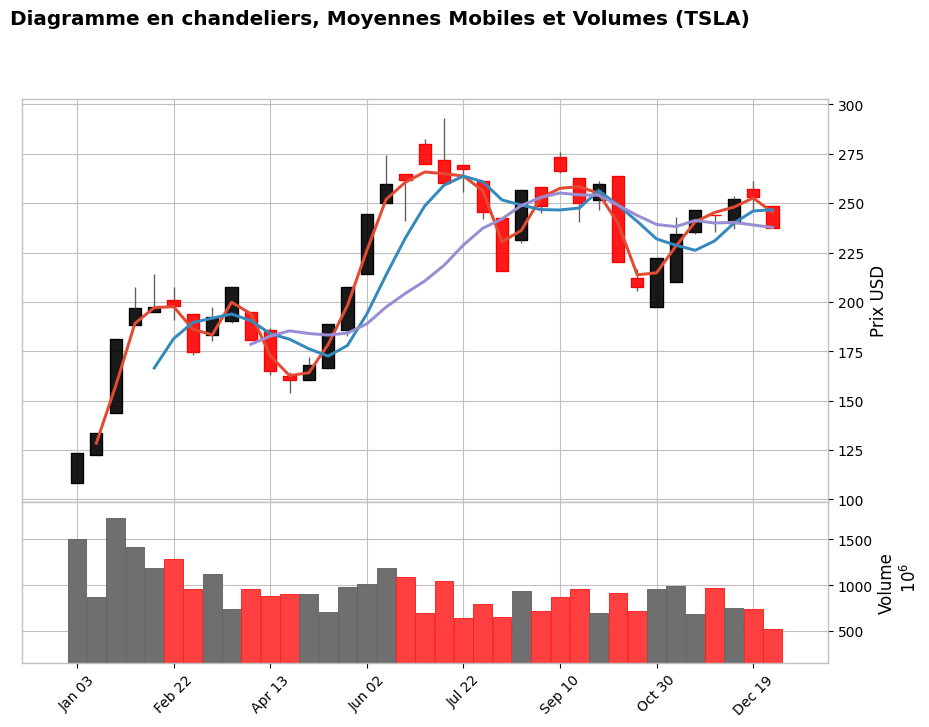

In [ ]:
# Tracé du diagramme en chandeliers.
mpf.plot(df_final, type='candle', style='checkers', title='Diagramme en chandeliers, Moyennes Mobiles et Volumes (TSLA)', ylabel='Prix USD', ylabel_lower='Volume',
         volume=True, mav=(2,5,10), figscale=1.4)

 * Ce diagramme synthétise les données importées initialement dans le dataframe *df_tesla*. Nous avons sur ce diagramme condensé beaucoup plus d'informations qu'avec le simple tracé du prix de clôture.

 * **Guide lecture:** Chaque bougie/chandelle est composé de trois éléments qui synthétisent les informations sur l'évolution de l'actif sur la période considérée (10 jours ici).
      * **Sa couleur:** Si le prix a baissé (resp. augmenté) sur la période la chandelle est rouge (resp. noire).
      * **Sa tige:** Ses extrémités indiquent le *Low* et le *High* de l'actif sur la période.
      * **Un rectangle de couleur:** Ses extrémités indiquent l'*Open* et le *Close* de l'actif sur la période. Si le rectangle est rouge, le prix de l'actif a baissé donc l'*Open* est l'extrémité haute et le *Close* l'extrémité basse. Si le rectangle est noir c'est l'inverse.

* Nous obtenons ainsi une première version de notre tableau de suivi d'indicateurs financiers: la lecture des données et les interprétations qui en découlent sont grandement facilitées avec ce type de diagramme. Dans les prochaines sections nous chercherons à compléter ce tableau avec d'autres indicateurs.

# **5. Indicateur MACD (Moving Average Convergence/Divergence) et courbe de Signal**

**5.1. Exponential Moving Averages (EMA)**

* Les **moyennes glissantes exponentielles (EMA)** sont des moyennes mobiles pondérées où les données les plus récentes possèdent un poids plus grand: les pondérations décroissent exponentiellement.
* Ce type de moyenne mobile est représente donc avec plus de fidélité les tendances évolutives des échantillons de données étudiés en donnant **plus d'importance aux changements de prix les plus récents**.
* Une **constante de lissage** $\alpha$ comprise entre 0 et 1 contrôle le degré de décroissance des poids appliqués aux observations. Dans le cas des EMA, le nombre de périodes $N$ sur lequel est calculé la moyenne ne correspond pas au nombre de valeurs participant au calcul (comme pour la SMA) mais sert à préciser la constante de lissage: $\alpha\approx\frac{2}{N+1}$

$EMA_{Today}= x_{Today}\cdot\alpha + EMA_{Yesterday}\cdot(1-\alpha)$

**5.2. Indicateur MACD et courbe de signal**

* L'**indicateur MACD** cherche à capturer le sens de l'évolution d'un actif et à mettre en lumière son inertie.  

* La courbe MACD est obtenue en soutrayant l'EMA sur 26 périodes *(Slow EMA)* à celle sur 12 périodes *(Fast EMA)*. On appelle "ligne de signal" l'EMA sur 9 périodes du MACD: cette courbe est utilisée par les investisseurs pour identifier les potentiels signaux d'achat ou de vente.

* Il s'agit en réalité d'une version améliorée de la stratégie des signaux de vente et d'achat que l'on a développé dans la partie 3 avec la moyenne mobile simple. Voici les deux principales différences:
  * On utilise des EMA plutôt que des SMA.
  * On compare deux moyennes mobiles (à court terme et long terme) entre-elles plutôt que de comparer le cours directement à sa moyenne mobile.

* Cette stratégie est censée être plus efficace pour identifier les potentiels changements de tendance et donc les signaux d'achat et de vente.

In [ ]:
# Fonction permettant de récupérer un dataframe avec les EMA slow/fast, le MACD, le Signal.
def MACD(df, span_slow, span_fast, span_signal):
    macd = pd.DataFrame()
    macd['EMA_slow'] = df['Close'].ewm(span=span_slow).mean()
    macd['EMA_fast'] = df['Close'].ewm(span=span_fast).mean()
    macd['macd'] = macd['EMA_fast'] - macd['EMA_slow']
    macd['signal'] = macd['macd'].ewm(span=span_signal).mean()
    macd['difference'] = macd['macd'] - macd['signal']
    macd['bar_negatif'] = macd['difference']
    macd['bar_negatif'][macd['bar_negatif']>0] = 0
    macd['bar_positif'] = macd['difference']
    macd['bar_positif'][macd['bar_positif']<0] = 0
    return macd
'''
Remarque: La fonction ewm de pandas permet d'appliquer à chaque observation une pondération en décroissance exponentielle sur un nombre de périodes donné (span) qui détermine
donc la constante de lissage alpha = 2/(1+span).
'''

"\nRemarque: La fonction ewm de pandas permet d'appliquer à chaque observation une pondération en décroissance exponentielle sur un nombre de périodes donné (span) qui détermine\ndonc la constante de lissage alpha = 2/(1+span).\n"

On complète notre tableau de bord avec le tracé de la courbe MACD (bleu) et de la ligne de signal (verte).

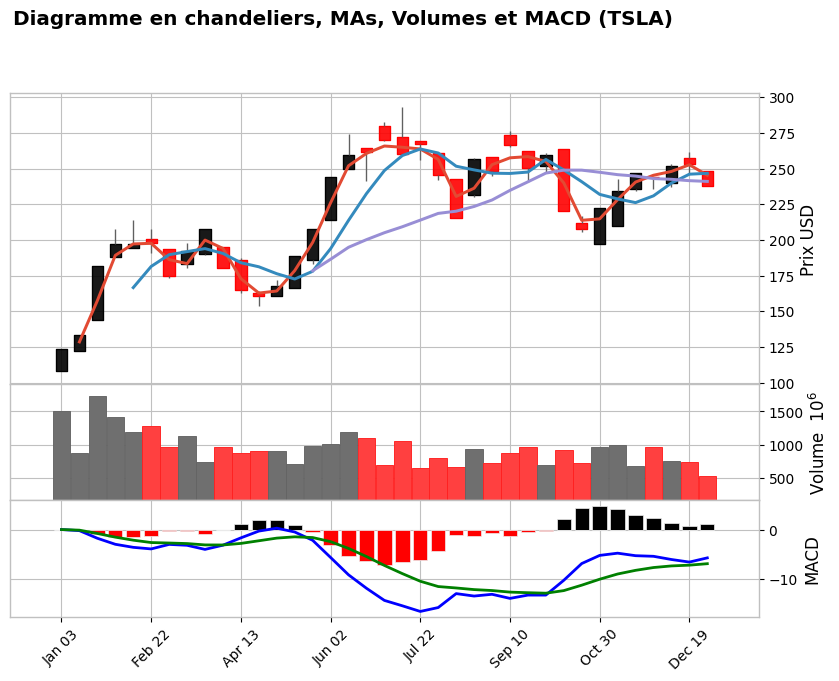

In [ ]:
# Récupération du dataframe MACD.
macd = MACD(df_final, 12, 26, 9)

# Création des tracés liés au MACD et à la courbe de Signal que l'on va ajouter à notre tableau.
macd_plot = [
mpf.make_addplot((macd['macd']), color='blue', panel=2, ylabel='MACD', secondary_y=False, width=2),
mpf.make_addplot((macd['signal']), color='green', panel=2, secondary_y=False, width=2),
mpf.make_addplot((macd['bar_positif']), type='bar', color='black', panel=2),
mpf.make_addplot((macd['bar_negatif']), type='bar', color='red', panel=2),
]
# Tracé du tableau de suivi d'indicateurs avec le MACD et la courbe de signal.
mpf.plot(df_final, type='candle', style='checkers', ylabel='Prix USD', volume=True, mav=(2,5,15), figscale=1.3,
         addplot=macd_plot, title='Diagramme en chandeliers, MAs, Volumes et MACD (TSLA)')

**5.2. Détection des signaux de vente/achat avec le MACD**

On effectue un jointure des dataframes *macd* et *df_tesla*.

In [ ]:
# Téléchargement des données financières.
df1 = yf.download("TSLA", start=datetime.datetime(2023, 8, 20), end=end)

# Récupération des données sur le MACD et le signal.
macd1 = MACD(df1, 12, 26, 9)

# Effectuer une jointure sur l'index de date en utilisant la méthode merge.
result = pd.merge(macd1, df1, left_index=True, right_index=True, how='inner')

# On crée une colonne qui est égale à la différence entre la colonne MACD et signal (On veut détecter les changements de signe).
result['difference'] = result['macd'] - result['signal']

[*********************100%%**********************]  1 of 1 completed


Fonction qui détecte les sigaux de vente/achat.

In [ ]:
# Stratégie détection signaux vente/achat avec le MACD.
def detection_sb_macd(df):
  n = len(df.index)
  columns_names = ['Date','macd']                                    # Création des dataframes dans lesquels on veut récupérer les signaux.
  buy_signals = pd.DataFrame(columns=columns_names)
  sell_signals = pd.DataFrame(columns=columns_names)
  dates_buy, dates_sell = [], []
  macd_buy, macd_sell = [], []
  for i in range(1,n):
    if df['difference'][i] >= 0 and df['difference'][i-1] <= 0:      # Changement de tendance (on achète).
      indice = df[df['difference'] == df['difference'][i]].index[0]  # Date du signal détecté.
      dates_buy.append(indice)
      macd_buy.append(df['signal'][indice])
    if df['difference'][i] <= 0 and df['difference'][i-1] >= 0:      # Changement de tendance (on vend).
      indice = df[df['difference'] == df['difference'][i]].index[0]  # Date du signal détecté.
      dates_sell.append(indice)
      macd_sell.append(df['signal'][indice])
  buy_signals['Date'] = dates_buy                                    # On complète à présent les df avec les signaux que l'on a détecté.
  buy_signals['macd'] = macd_buy
  buy_signals.set_index('Date', inplace=True)
  sell_signals['Date'] = dates_sell
  sell_signals['macd'] = macd_sell
  sell_signals.set_index('Date', inplace=True)
  return buy_signals, sell_signals

La stratégie du MACD permet de savoir quand acheter et quand vendre grâce à la condition suivante : si le MACD passe au dessus du signal, on achète, si le MACD passe en dessous du signal, on vend.

Affichage des signaux de vente/achat superposés aux courbes MACD et signal.

Text(0.5, 1.0, 'Visualisation des signaux buy/sell avec le MACD et le signal')

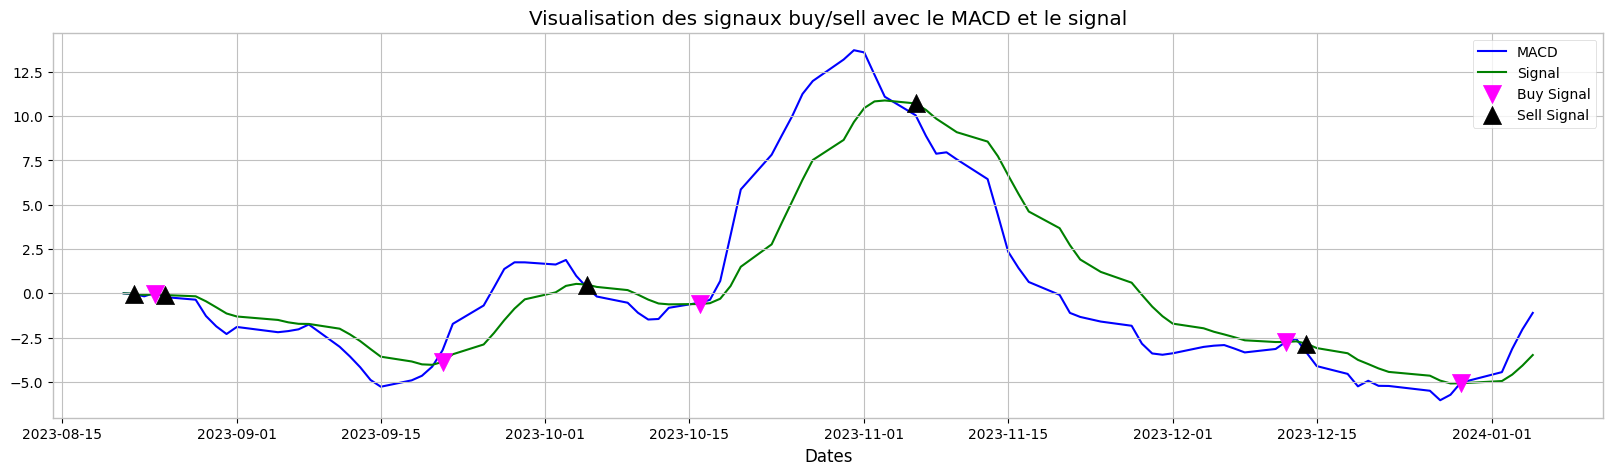

In [ ]:
# Récupération des signaux.
detection = detection_sb_macd(result)

# Affichage des courbes.
plt.figure(figsize=(20,5))
plt.plot(result.index, result['macd'], color='b', label='MACD', zorder=0)
plt.plot(result.index, result['signal'], color='g', label='Signal', zorder=0)
plt.scatter(detection[0].index, detection[0]['macd'], marker='v', color='magenta', s=170, label='Buy Signal', zorder=1)
plt.scatter(detection[1].index, detection[1]['macd'], marker='^', color='black', s=170, label='Sell Signal', zorder=1)
plt.xlabel('Dates')
plt.legend()
plt.title('Visualisation des signaux buy/sell avec le MACD et le signal')

# **6. Oscillateur Stochastique**

**6.1. Qu'est-ce qu'un oscillateur en analyse technique ?**

Le prix des actions est le résultat de la confrontation entre les acheteurs et les vendeurs. Quand les vendeurs sont plus nombreux, le prix de l’action baisse.

Quand les acheteurs sont les plus forts, le prix du titre augmente.

*   Une action est dite en **sur-vente** quand les vendeurs sont gagnants depuis plusieurs séances et que le titre a bien baissé. Les vendeurs commencent à se raréfier.
*   Une action est en **sur-achat** quand les acheteurs sont mènent la danse depuis plusieurs séances. Le cours a « trop » monté. Il n’y a plus grand monde pour acheter.

*Comment identifier ces signaux de sur-vente et de sur-achat?*

Les oscillateurs ont ce rôle. Il s'agit d'un outil d'analyse technique qui permet de construire une bande définie par deux valeurs extrêmes dans laquelle un indicateur de tendance évolue. Quand cet indicateur approche les bandes extrêmes, cela fournit des indications sur des signaux de sur-vente ou sur-achat.

**6.2. Oscillateur stochastique**

Cet oscillateur compare le prix actuel de l'actif à ses valeurs antérieures. Son but est de déterminer et d'anticiper les retournements de tendance en identifiant des signaux de sur-vente et de sur-achat. Il se calcule de la façon suivante: $\%K=100\cdot\frac{C-L_{14}}{H_{14}-L_{14}}$ où $H_{14}$ est le *High* maximal et $L_{14}$ le *Low* minimal sur la période des 14 derniers jours précédant la date actuelle de calcul de $\%K$ (C = Close). L'oscillateur stochastique étant très réactif et volatil, on le complète par sa moyenne glissante sur N périodes $\%D$ pour filtrer la courbe.

In [ ]:
# Fonction qui retourne un dataframe avec les valeurs de %K et %D sur le nombre de périodes considéré (span).
def stochastic_oscillator(df,span_so,span_ma):
  stochastic = pd.DataFrame()
  stochastic['High'] = df['High'].rolling(window=span_so, min_periods=0).max()
  stochastic['Low'] = df['Low'].rolling(window=span_so, min_periods=0).min()
  stochastic['%K'] = 100 * (df['Adj Close'] - stochastic['Low'])/(stochastic['High'] - stochastic['Low'])
  stochastic['%D'] = stochastic['%K'].rolling(window=span_ma, min_periods=0).mean()
  stochastic['UpLimit'] = 80
  stochastic['DownLimit'] = 20
  return stochastic

Affichage de l'oscillateur stochastique (%K,%D) calculé sur une période de 14 jours.

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2023-01-03,108.099998,123.559998,108.099998,123.559998,1501827400,116.317498
2023-01-13,122.400002,133.419998,122.400002,133.419998,872021400,128.652000
2023-01-23,143.750000,181.410004,143.750000,181.410004,1737456900,161.441250
2023-02-02,188.270004,207.320007,188.270004,196.889999,1423167800,196.474285
2023-02-12,194.639999,214.240005,194.639999,197.369995,1193281200,204.308332


,High,Low,%K,%D,UpLimit,DownLimit
Date,,,,,,
2023-01-03,123.559998,108.099998,53.153300,53.153300,80,20
2023-01-13,133.419998,108.099998,81.169045,67.161173,80,20
2023-01-23,181.410004,108.099998,72.761216,69.027854,80,20
2023-02-02,207.320007,108.099998,89.069017,80.999759,80,20
2023-02-12,214.240005,108.099998,90.642856,84.157696,80,20


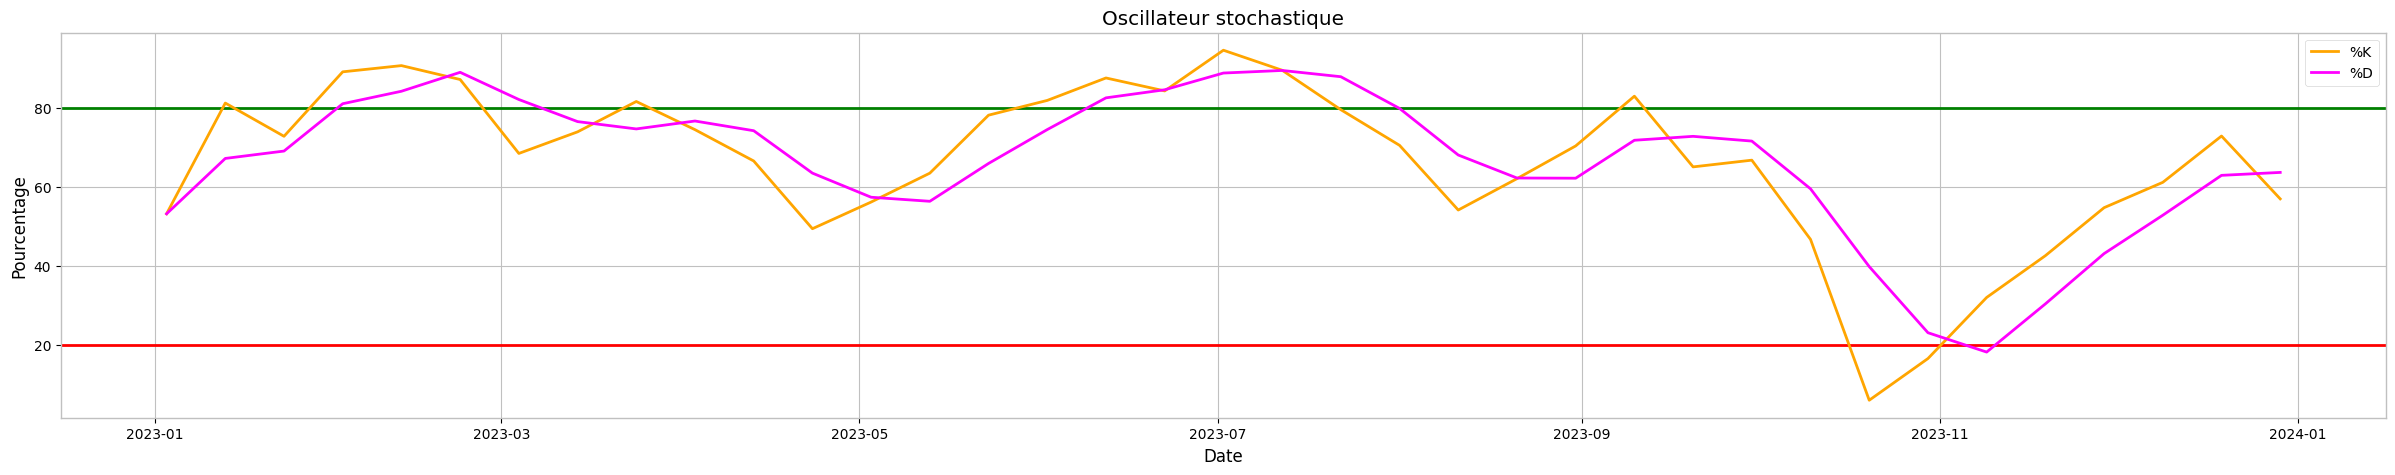

In [ ]:
# Echantillonnage (période de 10 jours).
df_adjc = df['Adj Close'].resample('10D').mean()

# Fusion des dataframes suivant la clée 'Date'.
df_TSLA = pd.merge(df_final, df_adjc, left_index=True, right_index=True)
display(df_TSLA.head())

# Récupération du dataframe avec les données de l'oscillateur stochastique.
stochastic = stochastic_oscillator(df_TSLA,14,3)
display(stochastic.head())

# Tracé de l'oscillateur stochastique.
plt.figure(figsize=(30,5))
plt.title('Oscillateur stochastique')
plt.xlabel('Date')
plt.ylabel('Pourcentage')
plt.axhline(y=80, color='g', linewidth=2)
plt.axhline(y=20, color='r', linewidth=2)
plt.plot(df_TSLA.index, stochastic['%K'], color='orange', label='%K', linewidth=2)
plt.plot(df_TSLA.index, stochastic['%D'], color='magenta', label='%D', linewidth=2)
plt.legend()

On intègre à présent notre indicateur sur notre tableau.

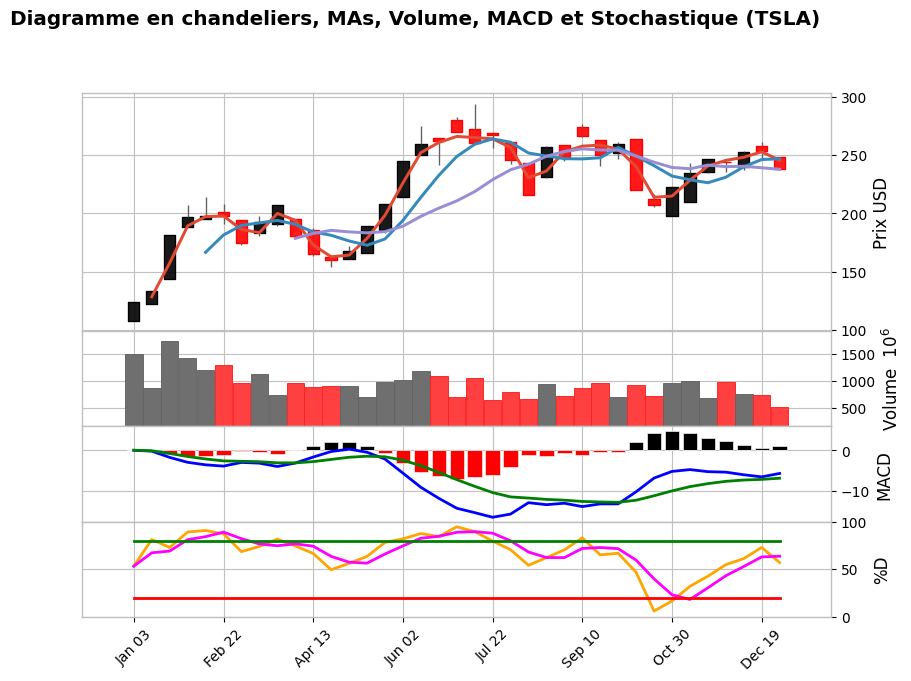

In [ ]:
# Tracé du stochastique et de sa MA.
# stochastic_plot = mpf.make_addplot(stochastic[['%K', '%D' ,'UpLimit','DownLimit']], ylim=[0, 100], panel=3, ylabel='Stochastique')
stochastic_plot = [
mpf.make_addplot((stochastic['%K']), color='orange', ylabel='%K', ylim=[0, 100], panel=3, width=2),
mpf.make_addplot((stochastic['%D']), color='magenta', ylabel='%D', ylim=[0, 100], panel=3, width=2),
mpf.make_addplot((stochastic['UpLimit']), color='green', ylim=[0, 100], panel=3, width=2),
mpf.make_addplot((stochastic['DownLimit']), color='red',ylim=[0, 100], panel=3, width=2),
]
plots = macd_plot.copy()
plots += stochastic_plot


# Tableau d'indicateurs avec l'oscillateur stochastique.
mpf.plot(df_TSLA, type='candle', volume=True, style='checkers', ylabel='Prix USD', mav=(2,5,10), figscale=1.3,
         addplot=plots, title='Diagramme en chandeliers, MAs, Volume, MACD et Stochastique (TSLA)')

**6.3. Représentation des signaux de sur-vente et de sur-achat**

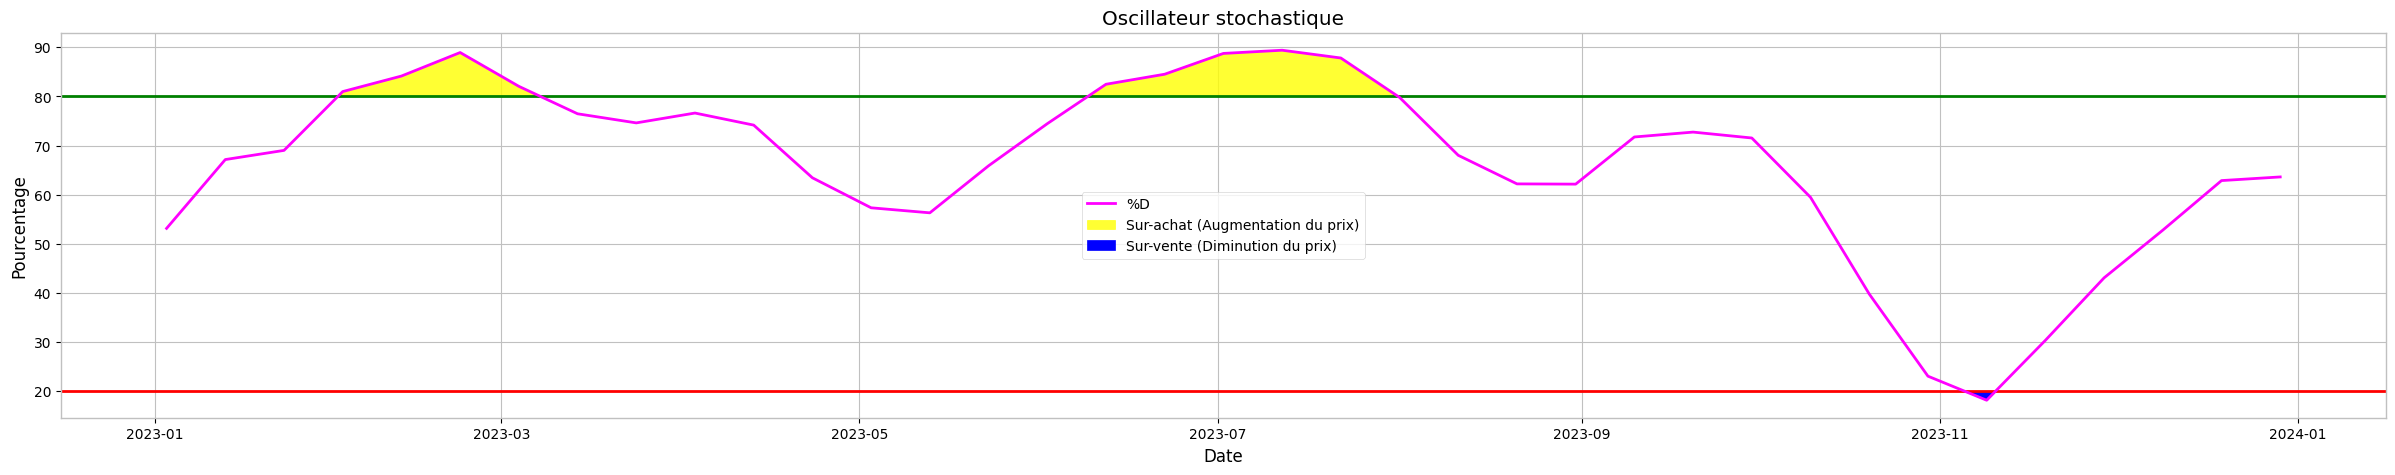

In [ ]:
# Tracé de l'oscillateur stochastique.
plt.figure(figsize=(30,5))
plt.title('Oscillateur stochastique')
plt.xlabel('Date')
plt.ylabel('Pourcentage')
plt.axhline(y=80, color='g', linewidth=2)
plt.axhline(y=20, color='r', linewidth=2)
plt.plot(df_TSLA.index, stochastic['%D'], color='magenta', label='%D', linewidth=2)
plt.fill_between(df_TSLA.index, stochastic['%D'], 80, where=(stochastic['%D'] > 80), interpolate=True, color='yellow', alpha=0.8 ,label="Sur-achat (Augmentation du prix)")
plt.fill_between(df_TSLA.index, stochastic['%D'], 20, where=(stochastic['%D'] < 20), interpolate=True, color='b',label="Sur-vente (Diminution du prix)")
plt.legend()

On effectue un zoom sur la courbe du prix de clôture ajusté des actions TSLA pour observer la zone de sur-achat qui se situe entre Juin 2023 et Août 2023. On observe bien une augmentation du prix sur cette période. Lorsque l'on quitte la zone le prix commence à descendre. Avant cette zone, le prix augmentait aussi ($\%D$ croissant) mais nous n'étions pas en zone de sur-achat: il est donc préférable d'acheter avant que l'on rentre dans cette zone.

[*********************100%%**********************]  1 of 1 completed


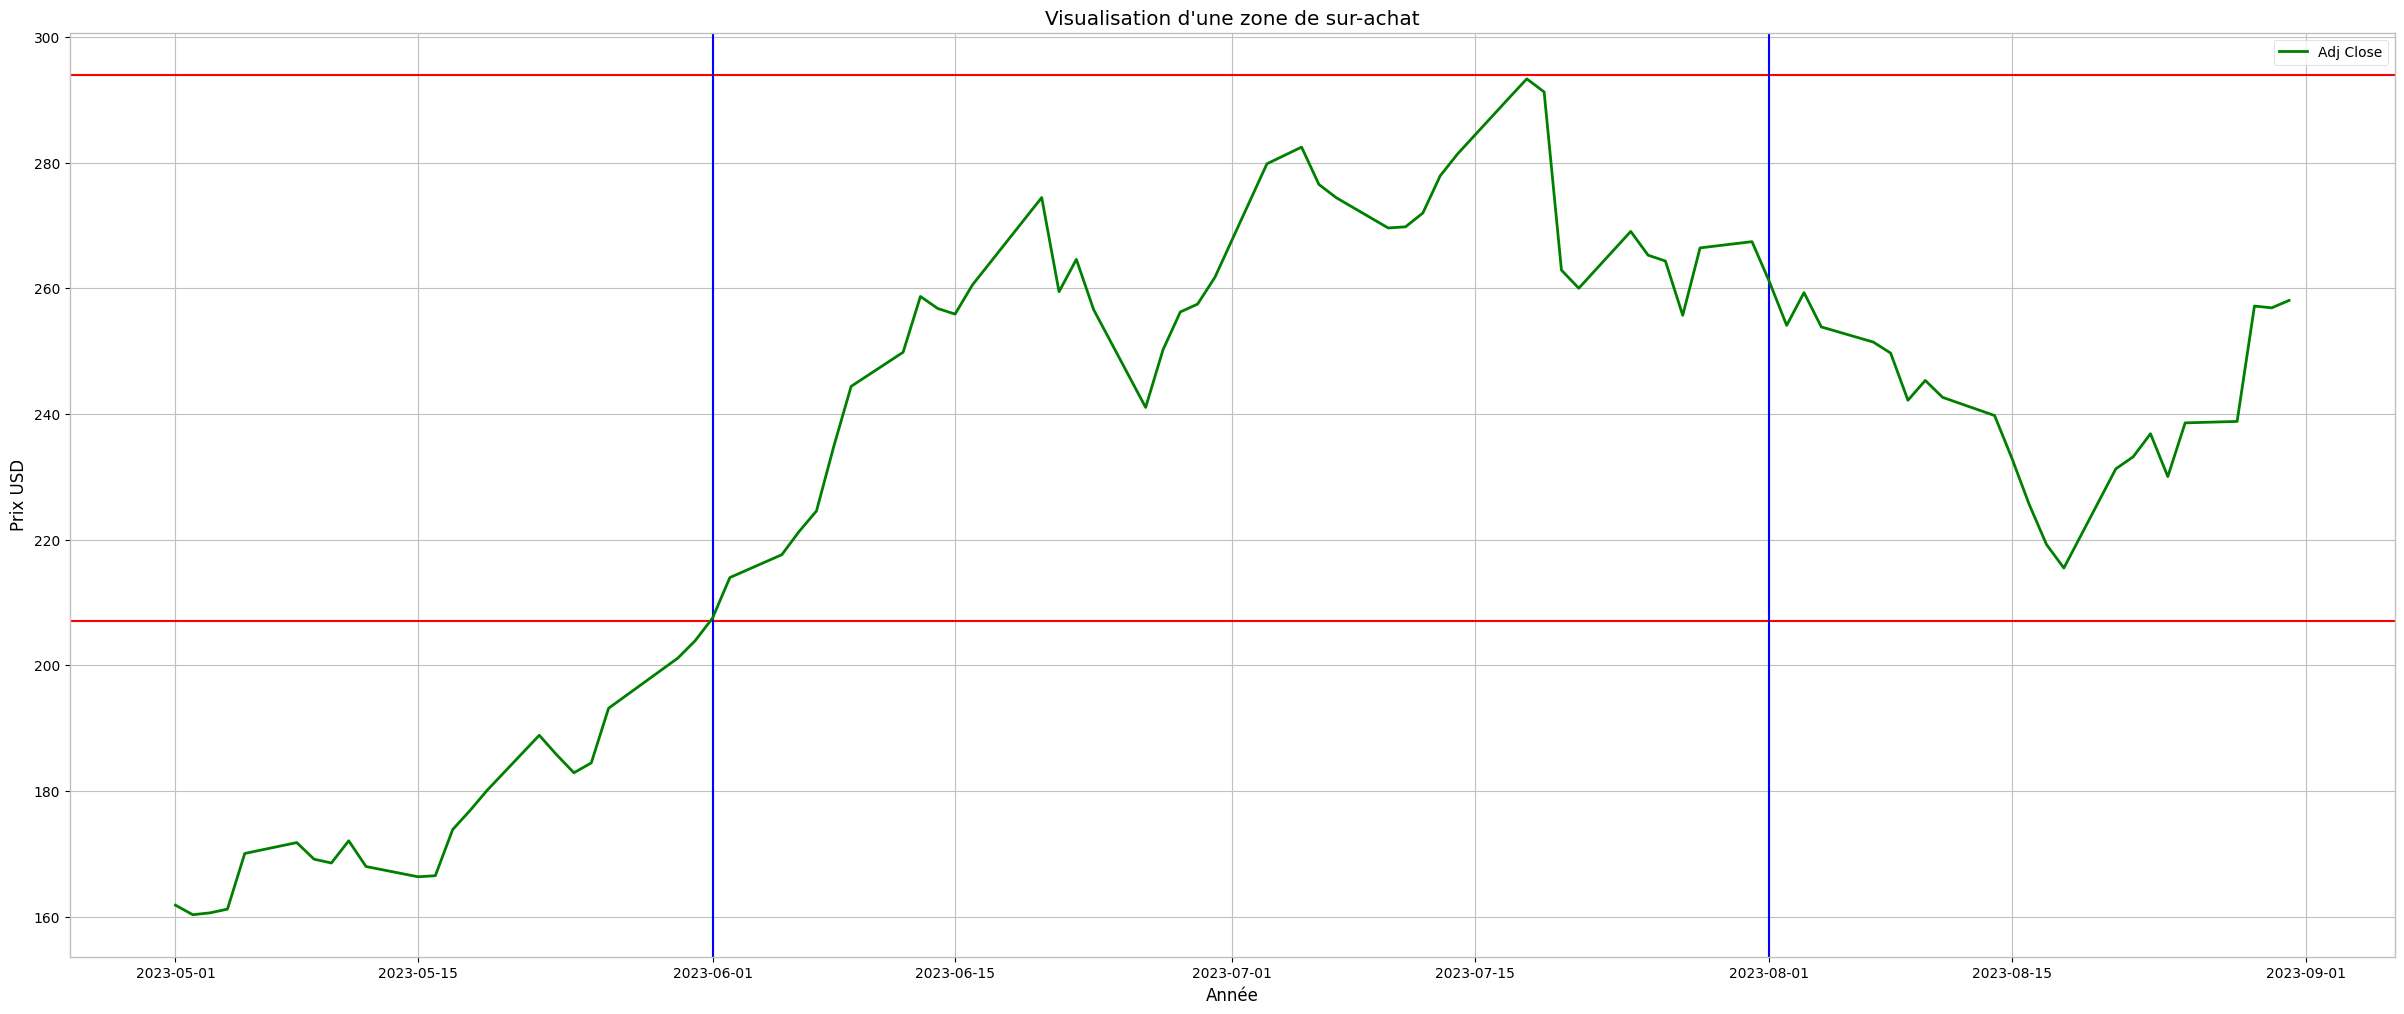

In [ ]:
# Affichage du graphique.
plt.figure(figsize=(30,12))
df_test = yf.download("TSLA", start=datetime.datetime(2023,5,1), end=datetime.datetime(2023,9,1))

# Marqueurs verticaux.
plt.axhline(y=207, color='r')
plt.axhline(y=294, color='r')
# Marqueurs horizontaux.
plt.axvline(x=mdates.date2num(pd.Timestamp('2023-06-01')), color='b')
plt.axvline(x=mdates.date2num(pd.Timestamp('2023-08-01')), color='b')
# Prix de clôture ajusté.
plt.plot(df_test.index,df_test['Adj Close'], color='green', label='Adj Close', linewidth=2)
plt.title("Visualisation d'une zone de sur-achat")
plt.xlabel("Année")
plt.ylabel("Prix USD")
plt.legend()

# **Sources**


* [1] Investopédia - Why Tesla Skyrocketed During Pandemic? (https://www.investopedia.com/why-tesla-skyrocketed-during-pandemic-5211590)
* [2] La Tribune - Tesla, grand champion en 2020 en Bourse, fait son entrée au S&P 500 (https://www.latribune.fr/bourse/tesla-grand-champion-de-2020-en-bourse-fait-son-entree-au-s-p-500-867663.html)
* [3] Investopedia - Moving Averages (https://www.investopedia.com/terms/m/movingaverage.asp)
* [4] Investopedia - Candlestick Chart Definition and Basics Explained (https://www.investopedia.com/terms/c/candlestick.asp)
* [5] Investopedia - MACD (https://www.investopedia.com/terms/m/macd.asp#toc-macd-formula)
* [6]   Investopedia - Stochastic Oscillator: What It Is, How It Works, How To Calculate (https://www.investopedia.com/terms/s/stochasticoscillator.asp)
